![대체 텍스트](https://www.pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_dataset_sample.png)


# MNIST is too easy.
Convolutional nets can achieve 99.7% on MNIST. Classic machine learning algorithms can also achieve 97% easily. 
# MNIST is overused. 
In this April 2017 Twitter thread, Google Brain research scientist and deep learning expert Ian Goodfellow calls for people to move away from MNIST.
# MNIST can not represent modern CV tasks.

# Fashion MNIST dataset
Similar to the MNIST digit dataset, the Fashion MNIST dataset includes:

60,000 training examples

10,000 testing examples

10 classes

28×28 grayscale/single channel images

![대체 텍스트](https://www.pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_obtaining.jpg)

In [0]:
import numpy as np
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras import optimizers

from keras import backend as K
K.set_image_dim_ordering('th')

%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


#STEP 1: Fashion MNIST 데이터 읽어들이기

In [0]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat", 
             "sandal", "shirt", "sneaker", "bag", "ankle boot"]

#STEP 2: 데이터 살펴보기

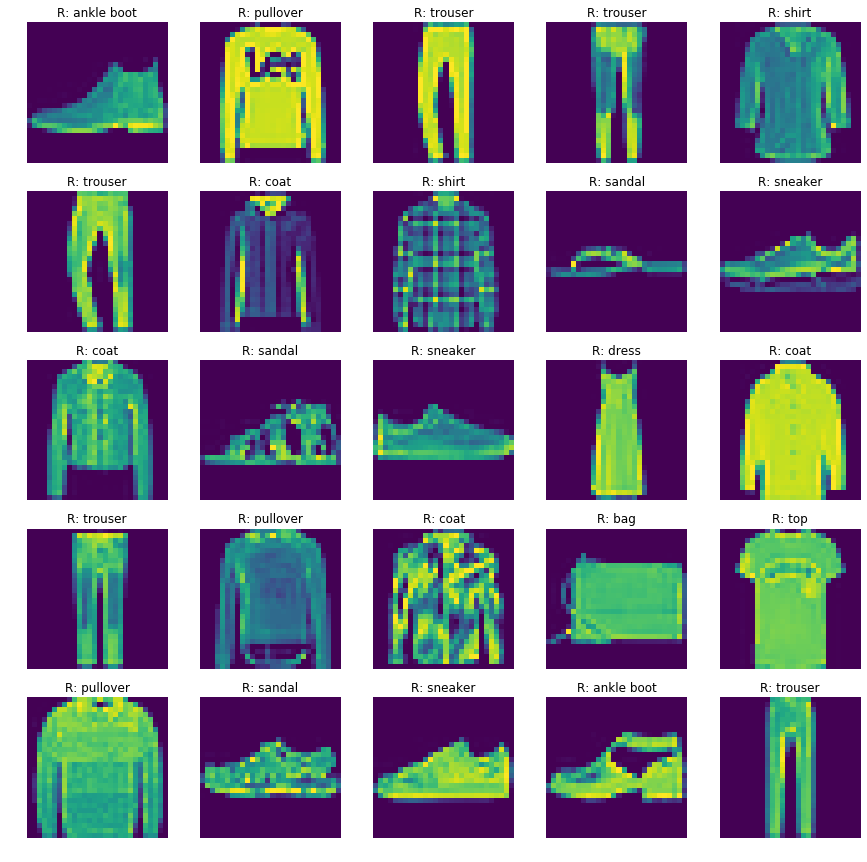

In [0]:
plt_row = 5
plt_col = 5

width = height = 28

plt.rcParams["figure.figsize"] = (15,15)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):

    sub_plt = axarr[int(i/plt_row), i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(testX[i].reshape(width, height))
    sub_plt_title = 'R: ' + labelNames[testY[i]]
    sub_plt.set_title(sub_plt_title)

plt.show()

#STEP 3: 딥러닝을 위한 데이터 전처리

In [0]:
# flatten 28*28 images to a 784 vector for each image
width = height = 28
num_pixels = width * height
trainX = trainX.reshape(60000, num_pixels).astype('float32') / 255.0
testX = testX.reshape(10000, num_pixels).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
valX = trainX[50000:]
valY = trainY[50000:]
trainX = trainX[:50000]
trainY = trainY[:50000]

# one hot encode outputs
num_classes = 10
trainY = np_utils.to_categorical(trainY, num_classes)
valY = np_utils.to_categorical(valY, num_classes)
testY = np_utils.to_categorical(testY, num_classes)


#STEP 4: 첫번째 인공지능 모델 (퍼셉트론)

![대체 텍스트](https://www.simplilearn.com/ice9/free_resources_article_thumb/diagram-of-a-biological-neuron.jpg)

![대체 텍스트](http://bit.ly/2ldH0Bg)

In [0]:
def logistic_regression_model():
    # create model
    model = Sequential()
    model.add(Dense(num_classes, input_dim=num_pixels, kernel_initializer='normal', activation='softmax'))
    # compile model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

#STEP 5: 첫번째 인공지능 모델 학습!!!

W0718 04:36:11.641558 140118360475520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 04:36:11.655344 140118360475520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 04:36:11.657675 140118360475520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0718 04:36:11.682698 140118360475520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 04:36:11.691297 140118360475520 deprecation_wrapper.

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.6312 - acc: 0.7909 - val_loss: 0.5224 - val_acc: 0.8210
Epoch 2/20
 - 2s - loss: 0.4889 - acc: 0.8361 - val_loss: 0.4791 - val_acc: 0.8317
Epoch 3/20
 - 2s - loss: 0.4605 - acc: 0.8435 - val_loss: 0.4620 - val_acc: 0.8388
Epoch 4/20
 - 2s - loss: 0.4440 - acc: 0.8487 - val_loss: 0.4665 - val_acc: 0.8395
Epoch 5/20
 - 2s - loss: 0.4352 - acc: 0.8517 - val_loss: 0.4430 - val_acc: 0.8498
Epoch 6/20
 - 2s - loss: 0.4280 - acc: 0.8543 - val_loss: 0.4387 - val_acc: 0.8463
Epoch 7/20
 - 2s - loss: 0.4221 - acc: 0.8551 - val_loss: 0.4389 - val_acc: 0.8458
Epoch 8/20
 - 2s - loss: 0.4173 - acc: 0.8573 - val_loss: 0.4425 - val_acc: 0.8438
Epoch 9/20
 - 2s - loss: 0.4125 - acc: 0.8589 - val_loss: 0.4431 - val_acc: 0.8442
Epoch 10/20
 - 2s - loss: 0.4107 - acc: 0.8583 - val_loss: 0.4288 - val_acc: 0.8504
Epoch 11/20
 - 2s - loss: 0.4069 - acc: 0.8604 - val_loss: 0.4289 - val_acc: 0.8493
Epoch 12/20
 - 2s - loss: 0.4042 - 

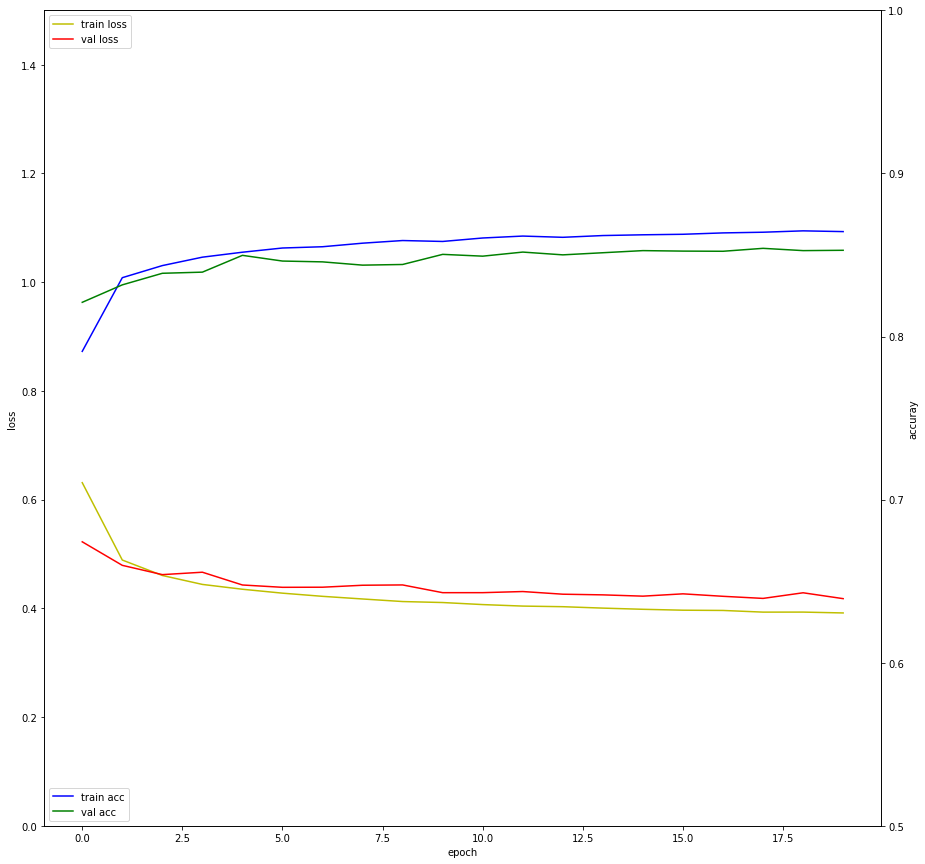

In [0]:
# build the model
model = logistic_regression_model()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# FIT THE MODEL - OPTIMIZATION
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=2)
model.save('logistic_regression_model.h5')

# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#STEP 6: 결과 확인 (테스트 데이터셋)

In [0]:
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 15.59%


#STEP 7: 학습된 weight 살펴보기

W shape :  (784, 10)


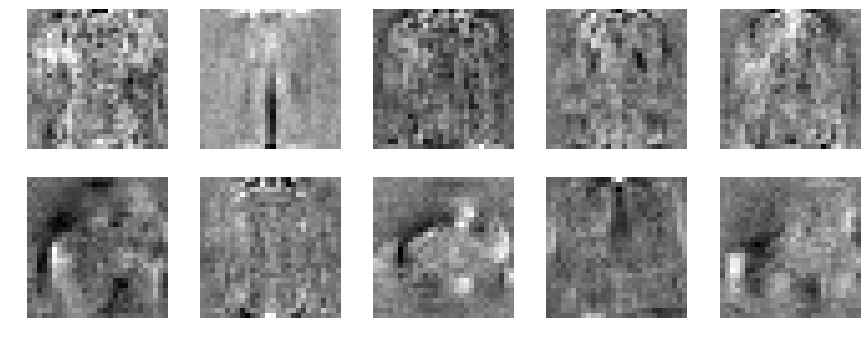

In [0]:
# Visualize weights
W = model.layers[0].get_weights()[0]
print("W shape : ", W.shape)

W = np.transpose(W, (1,0))

plt.figure(figsize=(15, 15), frameon=False)
for ind, val in enumerate(W):
    plt.subplot(5, 5, ind + 1)
    im = val.reshape((28,28))
    plt.axis("off")
    plt.imshow(im, cmap='gray',interpolation='nearest')

![대체 텍스트](https://www.pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_obtaining.jpg)

#STEP 8: 두번째 인공지능 모델 (MLP)

![대체 텍스트](https://www.researchgate.net/profile/Hadley_Brooks/publication/270274130/figure/fig3/AS:667886670594050@1536247999230/Architecture-of-a-multilayer-neural-network-with-one-hidden-layer-The-input-layer.png)

In [0]:
def multi_linear_perceptron_model():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # compile model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.8789 - acc: 0.7178 - val_loss: 0.6030 - val_acc: 0.7845
Epoch 2/20
 - 2s - loss: 0.5452 - acc: 0.8068 - val_loss: 0.5139 - val_acc: 0.8129
Epoch 3/20
 - 2s - loss: 0.4880 - acc: 0.8286 - val_loss: 0.4808 - val_acc: 0.8261
Epoch 4/20
 - 2s - loss: 0.4586 - acc: 0.8382 - val_loss: 0.4610 - val_acc: 0.8342
Epoch 5/20
 - 2s - loss: 0.4408 - acc: 0.8448 - val_loss: 0.4401 - val_acc: 0.8434
Epoch 6/20
 - 2s - loss: 0.4266 - acc: 0.8499 - val_loss: 0.4275 - val_acc: 0.8461
Epoch 7/20
 - 2s - loss: 0.4156 - acc: 0.8538 - val_loss: 0.4236 - val_acc: 0.8485
Epoch 8/20
 - 2s - loss: 0.4057 - acc: 0.8563 - val_loss: 0.4195 - val_acc: 0.8478
Epoch 9/20
 - 2s - loss: 0.3965 - acc: 0.8593 - val_loss: 0.4065 - val_acc: 0.8531
Epoch 10/20
 - 2s - loss: 0.3901 - acc: 0.8609 - val_loss: 0.3988 - val_acc: 0.8570
Epoch 11/20
 - 2s - loss: 0.3826 - acc: 0.8647 - val_loss: 0.3955 - val_acc: 0.8564
Epoch 12/20
 - 2s - loss: 0.3764 - 

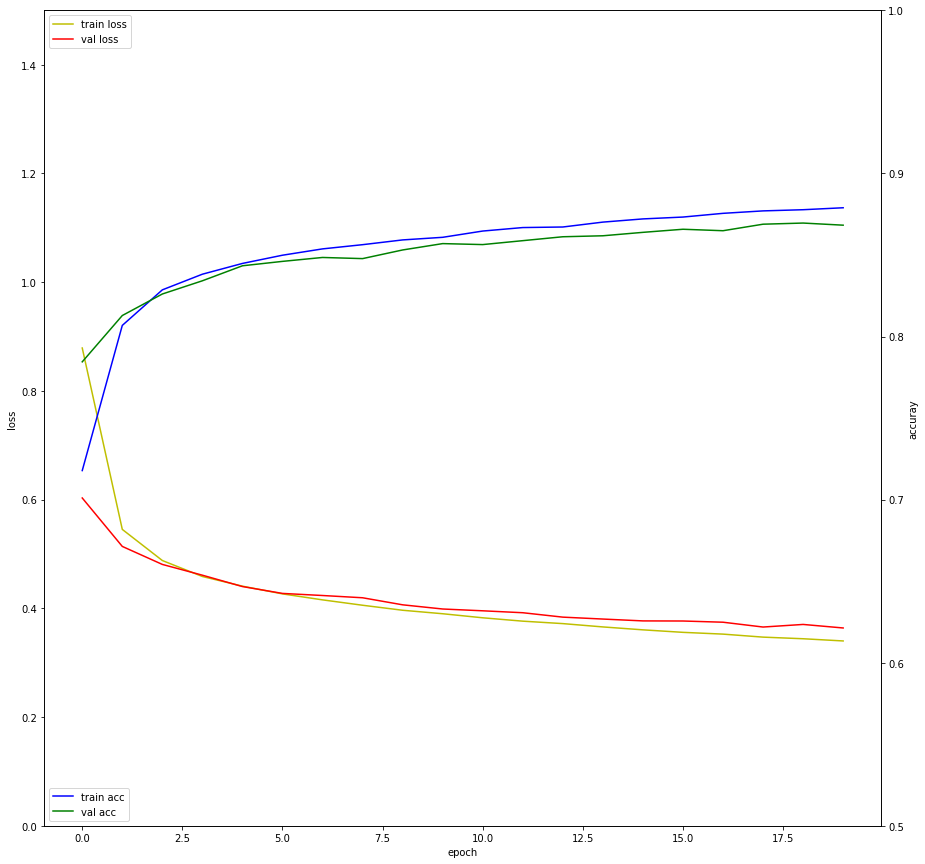

In [0]:
# build the model
model = multi_linear_perceptron_model()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=2)
model.save('multi_linear_perceptron_model.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 14.03%


#STEP 9: 세번째 인공지능 모델 (DEEP-MLP)

![대체 텍스트](https://i.stack.imgur.com/OH3gI.png)

In [0]:
def deep_perceptron_inital_model():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(256, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(256, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(256, kernel_initializer='normal', activation='sigmoid')) 
    model.add(Dense(256, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # compile model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 2.3187 - acc: 0.0975 - val_loss: 2.3147 - val_acc: 0.1050
Epoch 2/20
 - 3s - loss: 2.3150 - acc: 0.1004 - val_loss: 2.3078 - val_acc: 0.1021
Epoch 3/20
 - 3s - loss: 2.3110 - acc: 0.0975 - val_loss: 2.3068 - val_acc: 0.0970
Epoch 4/20
 - 3s - loss: 2.3092 - acc: 0.0998 - val_loss: 2.3062 - val_acc: 0.0970
Epoch 5/20
 - 3s - loss: 2.3070 - acc: 0.1021 - val_loss: 2.3076 - val_acc: 0.0970
Epoch 6/20
 - 3s - loss: 2.3065 - acc: 0.0999 - val_loss: 2.3040 - val_acc: 0.1021
Epoch 7/20
 - 3s - loss: 2.3054 - acc: 0.0995 - val_loss: 2.3041 - val_acc: 0.0970
Epoch 8/20
 - 3s - loss: 2.3050 - acc: 0.1004 - val_loss: 2.3054 - val_acc: 0.0955
Epoch 9/20
 - 2s - loss: 2.3041 - acc: 0.1029 - val_loss: 2.3036 - val_acc: 0.1021
Epoch 10/20
 - 3s - loss: 2.3042 - acc: 0.1019 - val_loss: 2.3032 - val_acc: 0.0968
Epoch 11/20
 - 3s - loss: 2.3042 - acc: 0.0991 - val_loss: 2.3022 - val_acc: 0.1050
Epoch 12/20
 - 2s - loss: 2.3037 - 

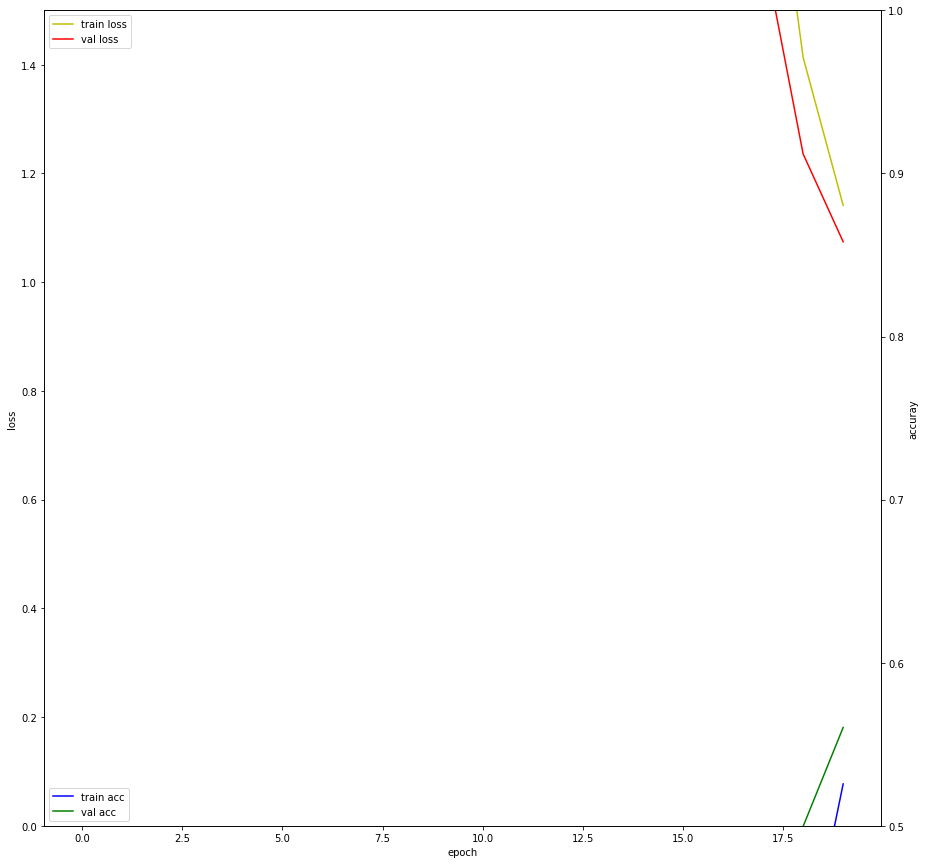

In [0]:
# build the model
model = deep_perceptron_inital_model()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=2)
model.save('deep_perceptron_initial_model.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 44.01%


#STEP 10: 세번째 인공지능 모델의 문제점과 개선

![대체 텍스트](https://image.slidesharecdn.com/usuconference-deeplearning-160418191119/95/introduction-to-deep-learning-7-638.jpg?cb=1461006739)

![대체 텍스트](https://miro.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png)

In [0]:
def deep_perceptron_model_with_dropout():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
#    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
#    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
#    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
#    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
#    model.add(Dropout(0.2))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # compile model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.6941 - acc: 0.7504 - val_loss: 0.5025 - val_acc: 0.8146
Epoch 2/20
 - 3s - loss: 0.4059 - acc: 0.8523 - val_loss: 0.3870 - val_acc: 0.8625
Epoch 3/20
 - 3s - loss: 0.3590 - acc: 0.8690 - val_loss: 0.3926 - val_acc: 0.8551
Epoch 4/20
 - 3s - loss: 0.3298 - acc: 0.8786 - val_loss: 0.3746 - val_acc: 0.8586
Epoch 5/20
 - 3s - loss: 0.3112 - acc: 0.8856 - val_loss: 0.3470 - val_acc: 0.8746
Epoch 6/20
 - 3s - loss: 0.2916 - acc: 0.8922 - val_loss: 0.3597 - val_acc: 0.8703
Epoch 7/20
 - 3s - loss: 0.2762 - acc: 0.8969 - val_loss: 0.3514 - val_acc: 0.8722
Epoch 8/20
 - 3s - loss: 0.2641 - acc: 0.9023 - val_loss: 0.3214 - val_acc: 0.8845
Epoch 9/20
 - 3s - loss: 0.2518 - acc: 0.9065 - val_loss: 0.3628 - val_acc: 0.8671
Epoch 10/20
 - 3s - loss: 0.2427 - acc: 0.9102 - val_loss: 0.3324 - val_acc: 0.8812
Epoch 11/20
 - 3s - loss: 0.2326 - acc: 0.9125 - val_loss: 0.3975 - val_acc: 0.8607
Epoch 12/20
 - 3s - loss: 0.2277 - 

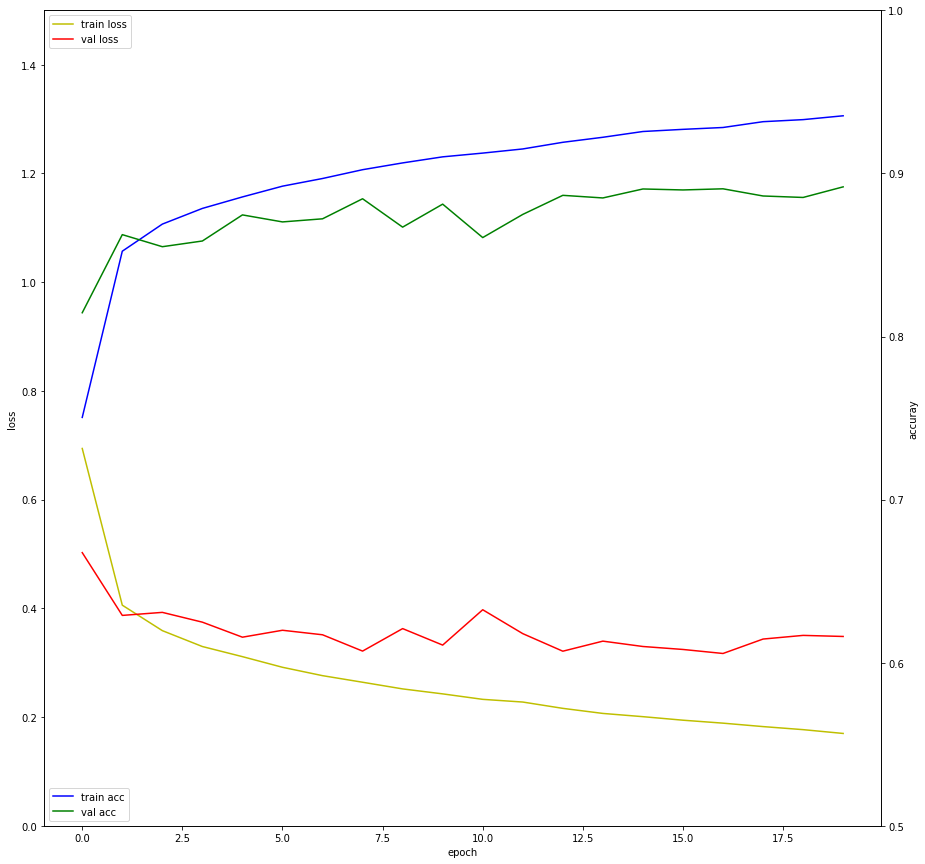

In [0]:
# build the model
model = deep_perceptron_model_with_dropout()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=2)
model.save('deep_perceptron_model_with_dropout.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 11.32%


#STEP 11: 네번째 인공지능 모델 (CNN)

![대체 텍스트](https://www.mdpi.com/entropy/entropy-19-00242/article_deploy/html/images/entropy-19-00242-g001.png)

** 중요! 입력데이터의 형태가 바뀌어야 한다. 

784 (1D) -> 28x28 (2D)

In [0]:
# reshape to be [samples][pixels][width][height]
trainX = trainX.reshape(50000, 1, 28, 28)
valX = valX.reshape(10000, 1, 28, 28)
testX = testX.reshape(10000, 1, 28, 28)


In [0]:
def simple_cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

W0718 04:39:21.629393 140118360475520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 5s - loss: 0.5532 - acc: 0.8034 - val_loss: 0.4422 - val_acc: 0.8401
Epoch 2/20
 - 3s - loss: 0.3594 - acc: 0.8721 - val_loss: 0.3396 - val_acc: 0.8770
Epoch 3/20
 - 3s - loss: 0.3081 - acc: 0.8886 - val_loss: 0.3432 - val_acc: 0.8737
Epoch 4/20
 - 3s - loss: 0.2764 - acc: 0.9001 - val_loss: 0.2971 - val_acc: 0.8872
Epoch 5/20
 - 3s - loss: 0.2539 - acc: 0.9081 - val_loss: 0.2716 - val_acc: 0.9013
Epoch 6/20
 - 3s - loss: 0.2339 - acc: 0.9130 - val_loss: 0.2658 - val_acc: 0.9017
Epoch 7/20
 - 3s - loss: 0.2156 - acc: 0.9208 - val_loss: 0.3002 - val_acc: 0.8926
Epoch 8/20
 - 3s - loss: 0.2020 - acc: 0.9256 - val_loss: 0.2682 - val_acc: 0.9033
Epoch 9/20
 - 3s - loss: 0.1864 - acc: 0.9307 - val_loss: 0.2752 - val_acc: 0.9000
Epoch 10/20
 - 3s - loss: 0.1745 - acc: 0.9363 - val_loss: 0.2507 - val_acc: 0.9103
Epoch 11/20
 - 3s - loss: 0.1629 - acc: 0.9408 - val_loss: 0.2665 - val_acc: 0.9044
Epoch 12/20
 - 3s - loss: 0.1524 - 

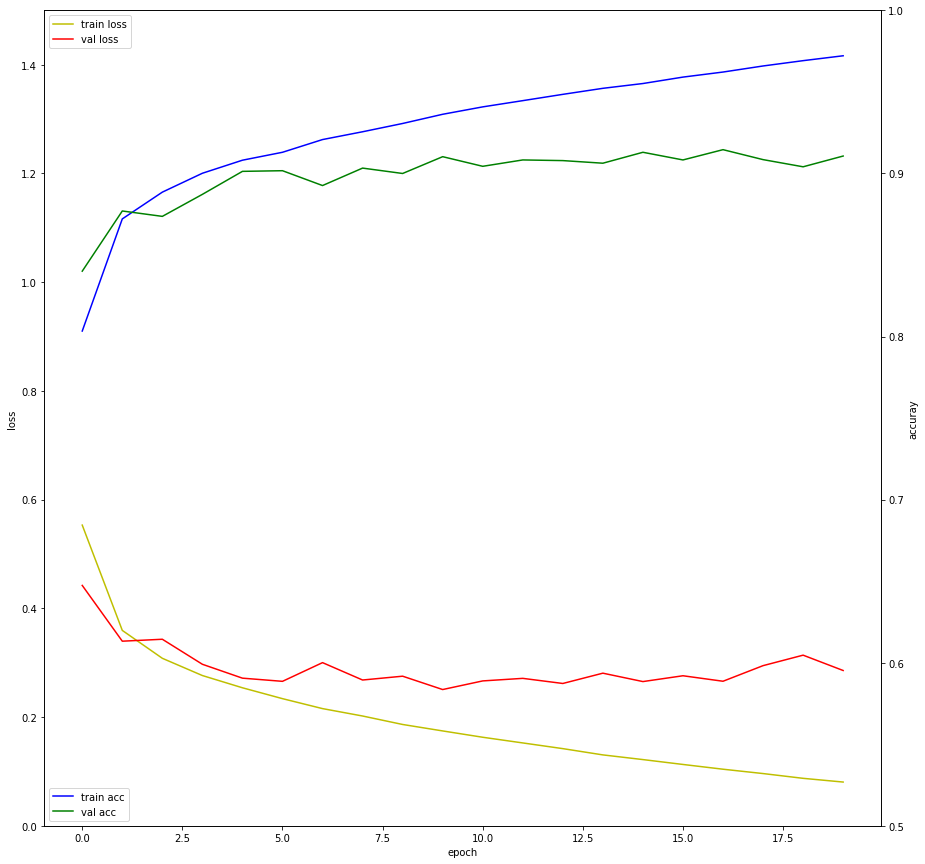

In [0]:
# build the model
model = simple_cnn_model()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=2)
model.save('simple_cnn_model.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 9.18%


#STEP 12: Convolution kernel 살펴보기 (5x5)

(5, 5, 32)


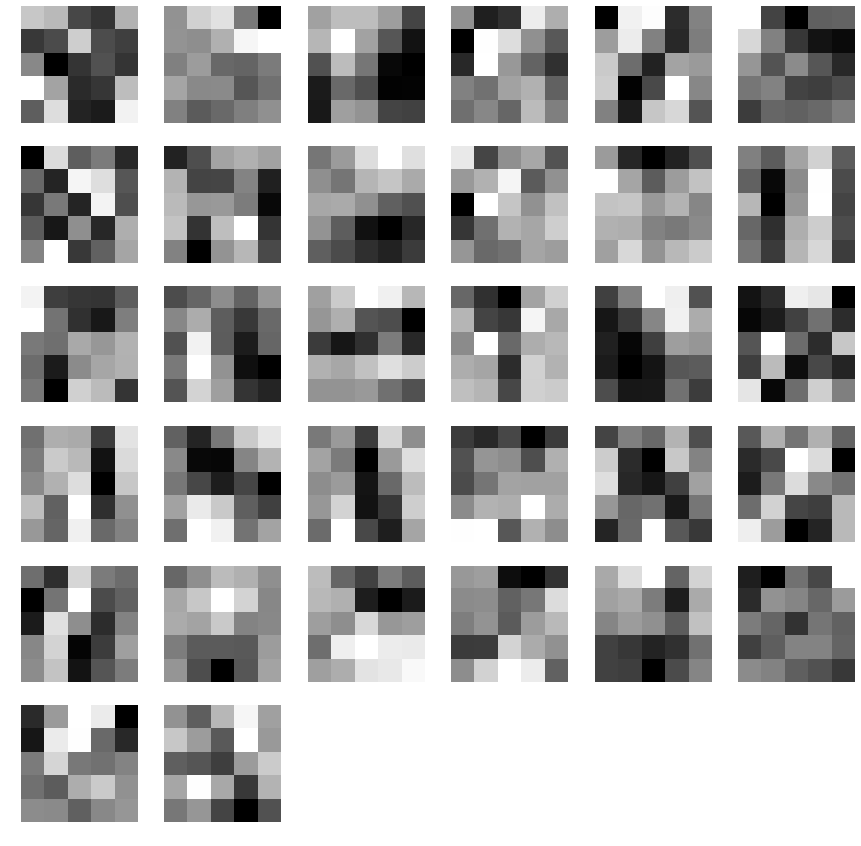

In [0]:
W1 = model.layers[0].get_weights()[0]
W1 = np.squeeze(W1)

print(W1.shape)
W1 = np.transpose(W1, (2,0,1))

plt.figure(figsize=(15, 15), frameon=False)
for ind, val in enumerate(W1):
    plt.subplot(6, 6, ind + 1)
    im = val.reshape((5,5))
    plt.axis("off")
    plt.imshow(im, cmap='gray',interpolation='nearest')

(3, 32, 12, 12)


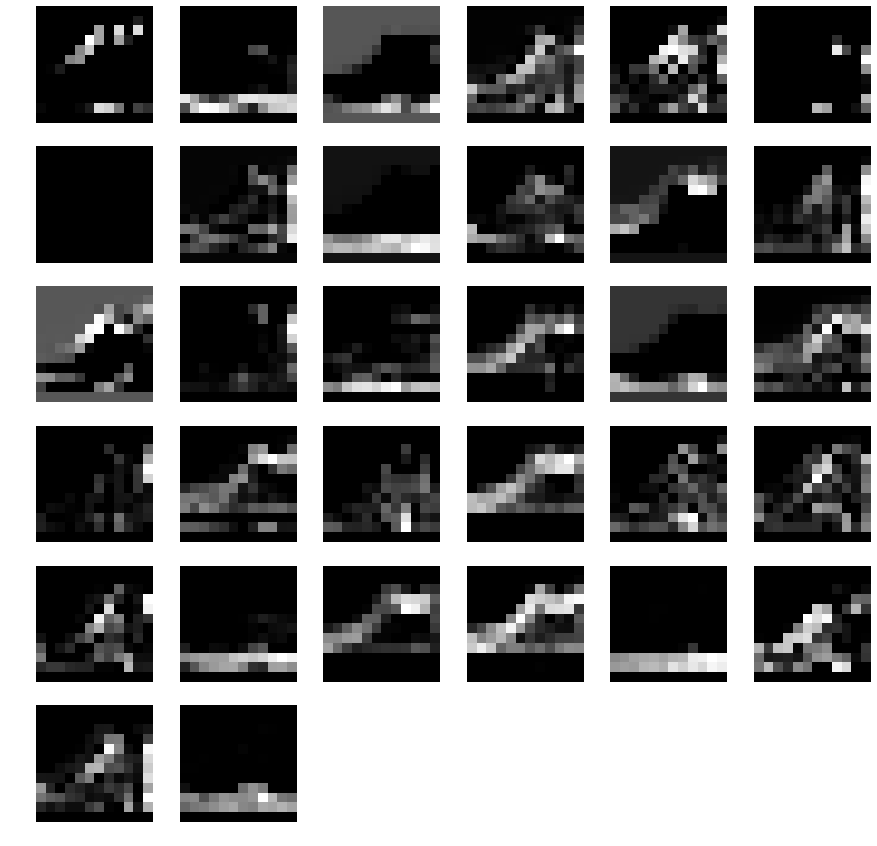

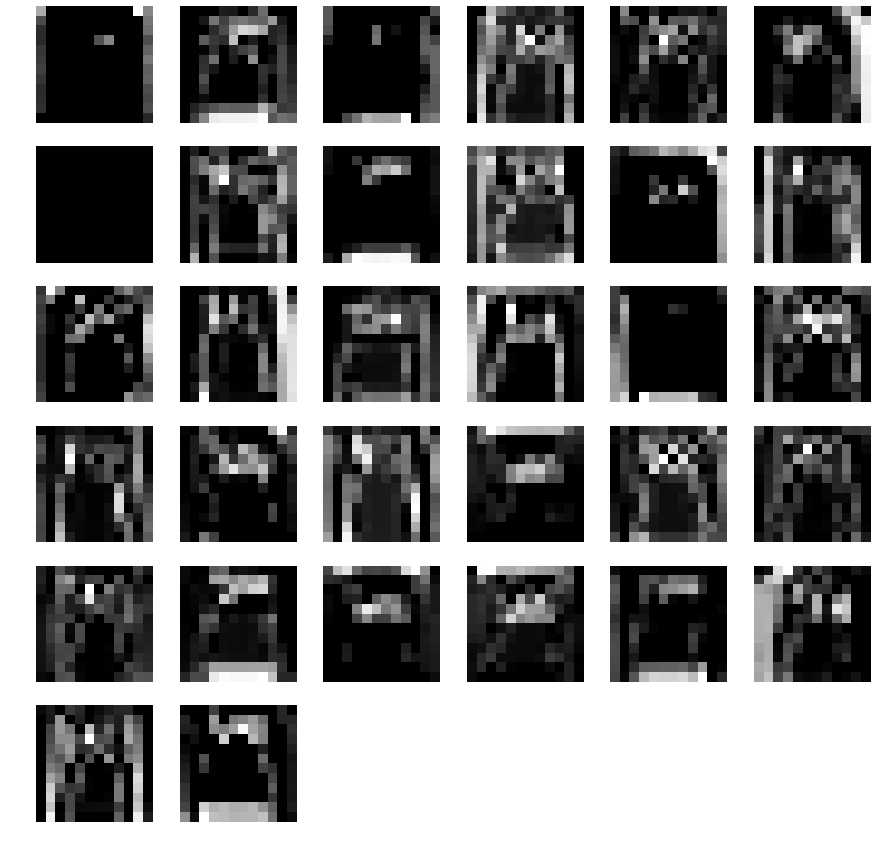

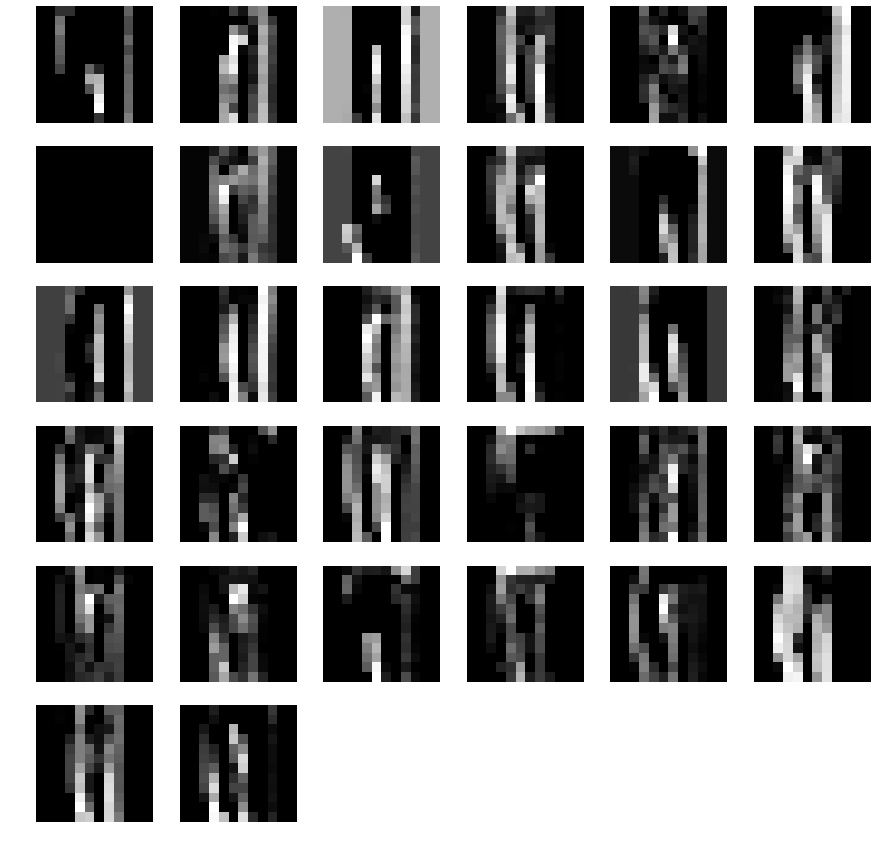

In [0]:
convout1_f = K.function([model.layers[0].input], [model.layers[1].output])

x_rep = convout1_f([testX[0:3]])
x_rep = np.squeeze(x_rep)

print(x_rep.shape)

for this_x_rep in x_rep:
    plt.figure(figsize=(15, 15), frameon=False)
    for ind, val in enumerate(this_x_rep):
        plt.subplot(6, 6, ind + 1)
        plt.axis("off")
        plt.imshow(val, cmap='gray',interpolation='nearest')

#STEP 13: 마지막 인공지능 모델 (VGG-like CNN)

![대체 텍스트](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)

In [0]:
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape=(1, 28, 28)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Conv2D(32, (3,3)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, (3,3)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

W0718 04:40:27.653589 140118360475520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0718 04:40:27.988276 140118360475520 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 7s - loss: 0.8027 - acc: 0.6972 - val_loss: 0.4974 - val_acc: 0.8089
Epoch 2/20
 - 6s - loss: 0.4903 - acc: 0.8197 - val_loss: 0.3563 - val_acc: 0.8672
Epoch 3/20
 - 6s - loss: 0.3895 - acc: 0.8611 - val_loss: 0.3315 - val_acc: 0.8756
Epoch 4/20
 - 6s - loss: 0.3409 - acc: 0.8794 - val_loss: 0.2774 - val_acc: 0.8975
Epoch 5/20
 - 6s - loss: 0.3096 - acc: 0.8894 - val_loss: 0.2541 - val_acc: 0.9066
Epoch 6/20
 - 6s - loss: 0.2839 - acc: 0.8996 - val_loss: 0.2511 - val_acc: 0.9080
Epoch 7/20
 - 6s - loss: 0.2681 - acc: 0.9044 - val_loss: 0.2476 - val_acc: 0.9090
Epoch 8/20
 - 6s - loss: 0.2525 - acc: 0.9089 - val_loss: 0.2423 - val_acc: 0.9142
Epoch 9/20
 - 6s - loss: 0.2409 - acc: 0.9133 - val_loss: 0.2280 - val_acc: 0.9197
Epoch 10/20
Epoch 11/20
 - 6s - loss: 0.2162 - acc: 0.9223 - val_loss: 0.2227 - val_acc: 0.9190
Epoch 12/20
 - 6s - loss: 0.2044 - acc: 0.9260 - val_loss: 0.2501 - val_acc: 0.9123
Epoch 13/20
 - 6s - los

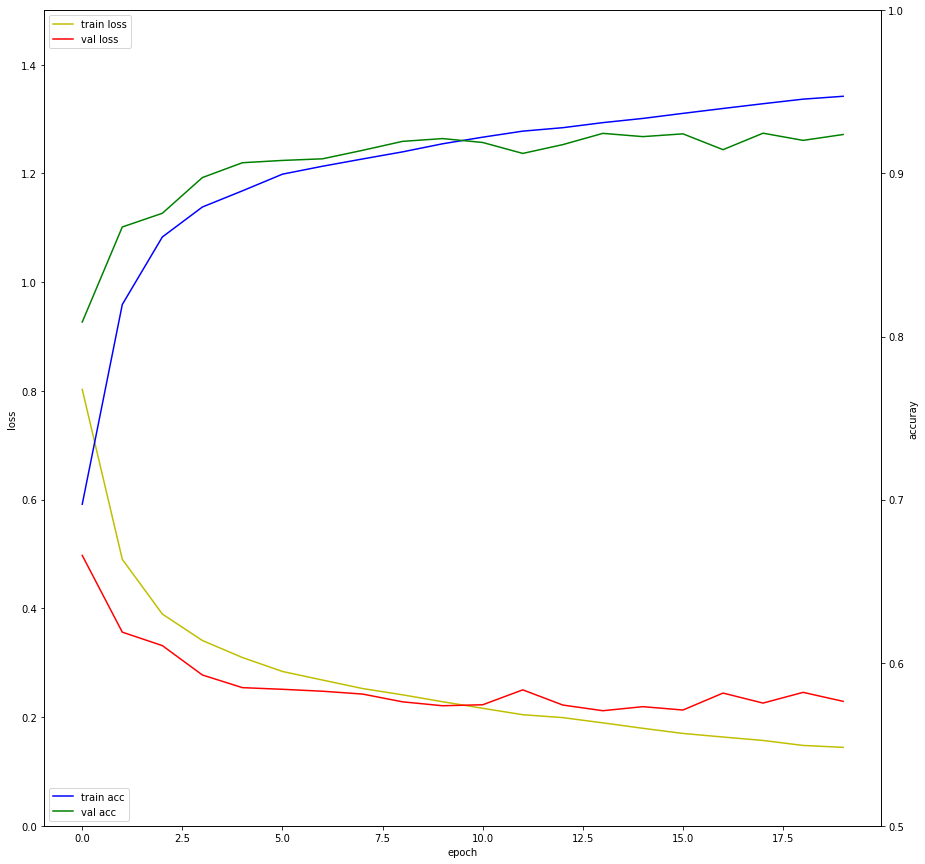

In [0]:
# build the model
model = cnn_model()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=2)
model.save('cnn_model.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 8.18%


#STEP 14: 결과 확인하기 (틀린 것 들만)

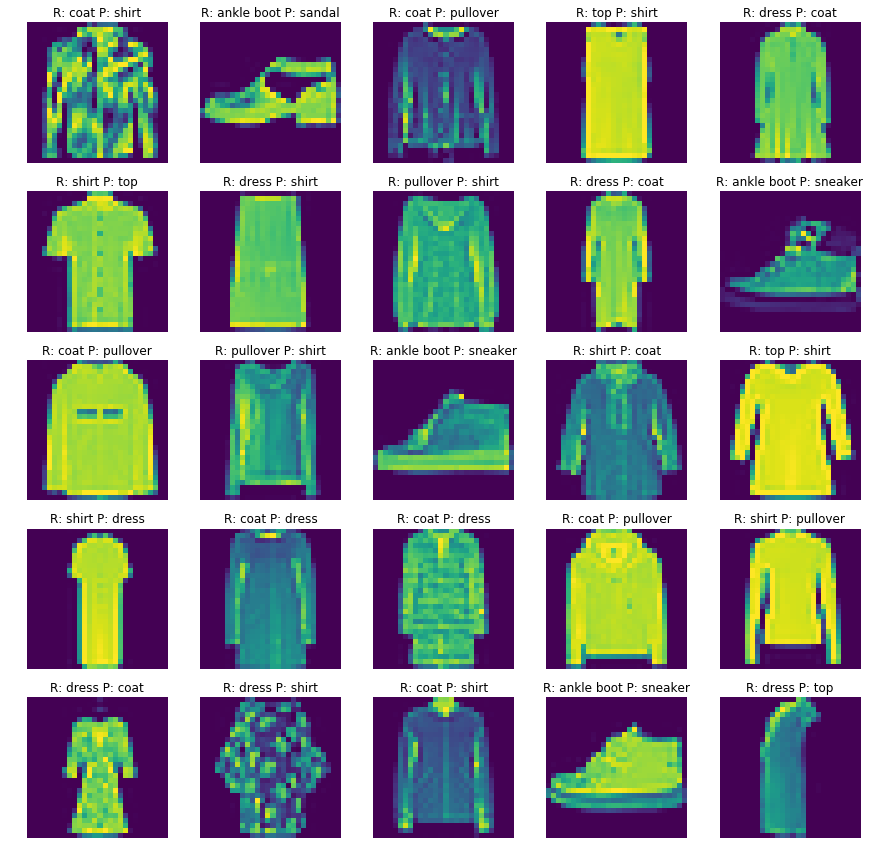

In [0]:
# 7. 모델 사용하기
yhat_test = model.predict(testX, batch_size=32)

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (15,15)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(testY[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[(int)(cnt/plt_row), cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(testX[i].reshape(width, height))
    sub_plt_title = 'R: ' + labelNames[np.argmax(testY[i])] + ' P: ' + labelNames[np.argmax(yhat_test[i])]
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()